In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import chartify
%matplotlib inline

Loading BokehJS ...

In [2]:
test = pd.read_csv('test.csv', index_col='PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train = pd.read_csv('train.csv', index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [4]:
#It seems safe to remove PassengerId as the index column and use name instead
train.index = train.Name

### Variables
Name, Sex, Age, Fare, Ticket (ticket id), Cabin (cabin #), Embarked (port of embarkation), Pclass (passenger class, rough estimate of SES, 1: Upper, 2: Middle, 3: Lower), Survived (1: yes, 0: no), Sibsp (# of siblings or spouse), Parch (# of parents or children)

Categorical: Name, Sex, Ticket, Cabin, Embarked, Survived

Ordinal: Pclass

Ratio: Age, Sibsp, Parch, Fare



Alphabetical: Name, Sex, Embarked

Alphanumerical: Ticket, Cabin

Numerical: Survived, Pclass, Age, Sibsp, Parch, Fare

##### Let us try to make as many variables numerical as possible and get rid of all NaNs

In [5]:
#Lets make Sex numerical. 1: female, 0: male
Sex_dict = {'female': 1, 'male': 0}


def Sex_apply(gender):
    return Sex_dict[gender]


train.Sex = train.Sex.apply(Sex_apply)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


Age, Cabin #, and Embarked have some null values. Since embarked only has 2, let's try to figure out who these people were.

In [7]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Icard, Miss. Amelie",1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
"Stone, Mrs. George Nelson (Martha Evelyn)",1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [8]:
#According to online research these two people were travelling together, and Miss. Amelie was the maid. They boarded at Southampton.
#Here is the source: https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
#Lets change their Embarked to S
train.loc['Icard, Miss. Amelie', 'Embarked'] = 'S'
train.loc['Stone, Mrs. George Nelson (Martha Evelyn)', 'Embarked'] = 'S'
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,


In [9]:
#Embarked can be changed into a numerical variable. The order of ports arrived was Southampton, Cherburg, and Queenstown.
#Thus 1: S, 2: C, 3: Q
Emb_dict = {'S': 1, 'C': 2, 'Q': 3}

train.Embarked = train.Embarked.apply(lambda x: Emb_dict[x])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
"Heikkinen, Miss. Laina",1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
"Allen, Mr. William Henry",0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


In [10]:
#We will use linear regression to fill in Age later, but it seems that Cabin has a very large number of NaNs for some systematic reason.
#Lets figure out why.
train.groupby('Cabin').mean().head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Cabin,,,,,,,,
A10,0.0,1.0,0.0,36.0,0.0,0.0,40.1250,2.0
A14,0.0,1.0,0.0,NaN,0.0,0.0,52.0000,1.0
A16,1.0,1.0,1.0,48.0,1.0,0.0,39.6000,2.0
A19,0.0,1.0,0.0,NaN,0.0,0.0,26.0000,1.0
A20,1.0,1.0,0.0,49.0,1.0,0.0,56.9292,2.0


In [11]:
train.Cabin = train.Cabin.fillna('A000000')
train.Cabin.unique()

array(['A000000', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [12]:
train.Cabin.value_counts().head()
#It seems that a value count of 3 or 4 indicates family, 2 indicates a couple, and 1 indicates an individual, whereas the NaNs mean no cabin.
#NOTE: I only put .head() throughout this analysis for readability, I have looked at the whole table or series

A000000        687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
Name: Cabin, dtype: int64

### Overall, we can conclude that the Cabin column displays whether people had or didn't have a cabin, and people generally had to pay extra for cabins, although there were some outliers who paid very little for them, mosty likely children or servants.

In [13]:
#Therefore we can change Cabin to a numerical variable. 0: No cabin, 1: Cabin
def Cabin_dict(cab_num):
    if cab_num == 'A000000':
        return 0
    else:
        return 1


train.Cabin = train.Cabin.apply(Cabin_dict)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
"Heikkinen, Miss. Laina",1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1
"Allen, Mr. William Henry",0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


### Sibsp and Parch are both very unintuitive variables. Let's do some feature engineering on them.
They can be divided into 12 different grouping of various sizes. Let us explore these groupings.

In [14]:
#People who were travelling alone
train.loc[(train.SibSp == 0) & (train.Parch == 0)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,537.000000,537.000000,537.000000,404.000000,537.0,537.0,537.000000,537.000000,537.000000
mean,0.303538,2.400372,0.234637,32.220297,0.0,0.0,21.242689,0.175047,1.370577
std,0.460214,0.804511,0.424167,12.899871,0.0,0.0,42.223510,0.380361,0.668110
min,0.000000,1.000000,0.000000,5.000000,0.0,0.0,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.0,0.0,7.775000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,29.500000,0.0,0.0,8.137500,0.000000,1.000000
75%,1.000000,3.000000,0.000000,39.000000,0.0,0.0,15.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,0.0,0.0,512.329200,1.000000,3.000000


In [15]:
#Mostly couples and siblings
train.loc[(train.SibSp == 1) & (train.Parch == 0)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,123.000000,123.000000,123.000000,102.000000,123.0,123.0,123.000000,123.000000,123.000000
mean,0.520325,1.959350,0.512195,32.068627,1.0,0.0,42.610402,0.365854,1.447154
std,0.501630,0.890739,0.501896,11.488272,0.0,0.0,36.359492,0.483639,0.629900
min,0.000000,1.000000,0.000000,12.000000,1.0,0.0,6.495800,0.000000,1.000000
25%,0.000000,1.000000,0.000000,24.250000,1.0,0.0,15.700000,0.000000,1.000000
50%,1.000000,2.000000,1.000000,30.000000,1.0,0.0,26.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.750000,1.0,0.0,60.287500,1.000000,2.000000
max,1.000000,3.000000,1.000000,63.000000,1.0,0.0,227.525000,1.000000,3.000000


In [16]:
#Children with 2 parents and many siblings
train.loc[(train.SibSp > 1) & (train.Parch == 2)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,32.000000,32.000000,32.000000,25.000000,32.000000,32.0,32.000000,32.000000,32.000000
mean,0.218750,2.687500,0.562500,11.080000,4.562500,2.0,77.309766,0.156250,1.062500
std,0.420013,0.737804,0.504016,7.076487,2.046831,0.0,82.730623,0.368902,0.245935
min,0.000000,1.000000,0.000000,1.000000,2.000000,2.0,7.925000,0.000000,1.000000
25%,0.000000,3.000000,0.000000,5.000000,3.000000,2.0,31.275000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,9.000000,4.000000,2.0,46.900000,0.000000,1.000000
75%,0.000000,3.000000,1.000000,17.000000,5.000000,2.0,69.550000,0.000000,1.000000
max,1.000000,3.000000,1.000000,24.000000,8.000000,2.0,263.000000,1.000000,2.000000


In [17]:
#1 woman travelling with a large family
train.loc[(train.SibSp > 1) & (train.Parch > 2)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0
mean,1.0,2.0,1.0,24.0,2.0,3.0,18.75,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,2.0,1.0,24.0,2.0,3.0,18.75,0.0,1.0
25%,1.0,2.0,1.0,24.0,2.0,3.0,18.75,0.0,1.0
50%,1.0,2.0,1.0,24.0,2.0,3.0,18.75,0.0,1.0
75%,1.0,2.0,1.0,24.0,2.0,3.0,18.75,0.0,1.0
max,1.0,2.0,1.0,24.0,2.0,3.0,18.75,0.0,1.0


In [18]:
#1 child with 1 parent, 1 parent with 1 child
train.loc[(train.SibSp == 0) & (train.Parch == 1)].describe().head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,38.000000,38.000000,38.000000,37.000000,38.0,38.0,38.000000,38.000000,38.000000
mean,0.657895,1.789474,0.631579,29.524865,0.0,1.0,73.470400,0.552632,1.368421
std,0.480783,0.874809,0.488852,17.940197,0.0,0.0,99.867922,0.503897,0.488852
min,0.000000,1.000000,0.000000,0.420000,0.0,1.0,8.404200,0.000000,1.000000
25%,0.000000,1.000000,0.000000,16.000000,0.0,1.0,14.865650,0.000000,1.000000


In [19]:
#2 parents 1 child, 2 siblings 1 parent
train.loc[(train.SibSp == 1) & (train.Parch == 1)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,57.000000,57.000000,57.00000,54.000000,57.0,57.0,57.000000,57.000000,57.000000
mean,0.596491,2.228070,0.45614,27.064815,1.0,1.0,36.379751,0.280702,1.298246
std,0.494962,0.779596,0.50250,17.795437,0.0,0.0,33.621948,0.453336,0.533349
min,0.000000,1.000000,0.00000,0.670000,1.0,1.0,7.229200,0.000000,1.000000
25%,0.000000,2.000000,0.00000,10.500000,1.0,1.0,15.741700,0.000000,1.000000
50%,1.000000,2.000000,0.00000,30.500000,1.0,1.0,24.150000,0.000000,1.000000
75%,1.000000,3.000000,1.00000,39.000000,1.0,1.0,37.004200,1.000000,2.000000
max,1.000000,3.000000,1.00000,70.000000,1.0,1.0,164.866700,1.000000,3.000000


In [20]:
#1 child with 2 parents, 1 parent with 2 children
train.loc[(train.SibSp == 0) & (train.Parch == 2)].describe().head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,29.000000,29.000000,29.000000,26.000000,29.0,29.0,29.000000,29.000000,29.00000
mean,0.724138,2.103448,0.689655,20.993462,0.0,2.0,45.255455,0.379310,1.37931
std,0.454859,0.859602,0.470824,14.786924,0.0,0.0,49.272019,0.493804,0.56149
min,0.000000,1.000000,0.000000,0.830000,0.0,2.0,7.750000,0.000000,1.00000
25%,0.000000,1.000000,0.000000,8.250000,0.0,2.0,15.741700,0.000000,1.00000


In [21]:
#4 single moms with many children
train.loc[(train.SibSp == 0) & (train.Parch > 2)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,4.00,4.0,4.0,4.000000,4.0,4.000000,4.000000,4.0,4.000000
mean,0.25,3.0,1.0,33.250000,0.0,4.250000,27.286450,0.0,1.750000
std,0.50,0.0,0.0,8.098354,0.0,0.957427,9.313066,0.0,0.957427
min,0.00,3.0,1.0,24.000000,0.0,3.000000,19.258300,0.0,1.000000
25%,0.00,3.0,1.0,27.750000,0.0,3.750000,20.620825,0.0,1.000000
50%,0.00,3.0,1.0,34.000000,0.0,4.500000,25.100000,0.0,1.500000
75%,0.25,3.0,1.0,39.500000,0.0,5.000000,31.765625,0.0,2.250000
max,1.00,3.0,1.0,41.000000,0.0,5.000000,39.687500,0.0,3.000000


In [22]:
#Small group, probably mostly adult siblings travelling together
train.loc[(train.SibSp > 1) & (train.Parch == 0)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,18.000000,18.000000,18.000000,15.000000,18.000000,18.0,18.000000,18.000000,18.000000
mean,0.333333,2.444444,0.277778,31.800000,2.111111,0.0,38.857178,0.111111,1.388889
std,0.485071,0.783823,0.460889,11.251667,0.323381,0.0,35.575593,0.323381,0.777544
min,0.000000,1.000000,0.000000,16.000000,2.000000,0.0,7.925000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,24.000000,2.000000,0.0,16.387500,0.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,2.000000,0.0,22.464600,0.000000,1.000000
75%,1.000000,3.000000,0.750000,39.000000,2.000000,0.0,67.994800,0.000000,1.000000
max,1.000000,3.000000,1.000000,53.000000,3.000000,0.0,133.650000,1.000000,3.000000


In [23]:
#2 parents with 2 children, 2 siblings with 2 parents
train.loc[(train.SibSp == 1) & (train.Parch == 2)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,19.000000,19.000000,19.000000,17.000000,19.0,19.0,19.000000,19.000000,19.000000
mean,0.631579,1.842105,0.578947,20.465882,1.0,2.0,71.615137,0.368421,1.157895
std,0.495595,0.764719,0.507257,14.797290,0.0,0.0,51.071585,0.495595,0.374634
min,0.000000,1.000000,0.000000,0.920000,1.0,2.0,20.575000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,5.000000,1.0,2.0,27.750000,0.000000,1.000000
50%,1.000000,2.000000,1.000000,24.000000,1.0,2.0,41.579200,0.000000,1.000000
75%,1.000000,2.000000,1.000000,33.000000,1.0,2.0,120.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,48.000000,1.0,2.0,151.550000,1.000000,2.000000


In [24]:
#2 parent with many children
train.loc[(train.SibSp == 1) & (train.Parch > 2)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.0
mean,0.200000,2.700000,0.600000,42.600000,1.0,4.200000,55.138750,0.100000,1.0
std,0.421637,0.674949,0.516398,12.402509,0.0,1.032796,73.300235,0.316228,0.0
min,0.000000,1.000000,0.000000,16.000000,1.0,3.000000,23.000000,0.000000,1.0
25%,0.000000,3.000000,0.000000,39.000000,1.0,3.250000,28.743750,0.000000,1.0
50%,0.000000,3.000000,1.000000,41.500000,1.0,4.000000,31.331250,0.000000,1.0
75%,0.000000,3.000000,1.000000,47.250000,1.0,5.000000,34.375000,0.000000,1.0
max,1.000000,3.000000,1.000000,64.000000,1.0,6.000000,263.000000,1.000000,1.0


In [25]:
#Children with 1 parent and many siblings
train.loc[(train.SibSp > 1) & (train.Parch == 1)].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,23.000000,23.000000,23.000000,19.000000,23.000000,23.0,23.000000,23.000000,23.000000
mean,0.260870,2.826087,0.434783,6.973684,3.086957,1.0,28.448009,0.086957,1.478261
std,0.448978,0.387553,0.506870,7.226924,0.848155,0.0,8.521293,0.288104,0.790257
min,0.000000,2.000000,0.000000,0.750000,2.000000,1.0,11.500000,0.000000,1.000000
25%,0.000000,3.000000,0.000000,2.000000,2.000000,1.0,21.075000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,4.000000,3.000000,1.0,27.000000,0.000000,1.000000
75%,0.500000,3.000000,1.000000,8.000000,4.000000,1.0,39.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,24.000000,4.000000,1.0,39.687500,1.000000,3.000000


It would be useful to describe these 2 columns with 1 alternative features. These should be the number of people you are
travelling with and the number of old or really young people you are travelling with. It will be really tough to tell the second variable
so for now we will only do the first thing.

In [26]:
train['Copassengers'] = train.SibSp + train.Parch
train = train.drop(columns=['Name', 'Cabin'])

### I just realized that you couldn't travel on the Titanic without buying a cabin. Therefore, the cabin column is worthless and needs to be dropped

In [27]:
#Let's create a new feature called title
temp = pd.Series(
    train.index.str.split(pat='.', expand=True).get_level_values(0))

In [28]:
temp2 = temp.str.split(pat=',', expand=True).iloc[:, 1]
temp3 = temp.str.split(pat=',', expand=True).iloc[:, 0]

temp2.name = 'Title'
temp3.name = 'Surname'

train = train.assign(Title=pd.Series(temp2).values)
train = train.assign(Surname=pd.Series(temp3).values)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Copassengers,Title,Surname
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,0,22.0,1,0,A/5 21171,7.2500,1,1,Mr,Braund
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,1,38.0,1,0,PC 17599,71.2833,2,1,Mrs,Cumings
"Heikkinen, Miss. Laina",1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1,0,Miss,Heikkinen
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,35.0,1,0,113803,53.1000,1,1,Mrs,Futrelle
"Allen, Mr. William Henry",0,3,0,35.0,0,0,373450,8.0500,1,0,Mr,Allen


At this point the name can be dropped because the name in the parentheses is the woman's maiden name, and the name outside of the parentheses is the husband's name. The only useful information in this is the last name, since that can be used to figure out families.

In [29]:
train.index = train.Surname
train = train.drop(columns=['Surname'])

Now we have to decide whether it is useful to keep ticket or not. While people with the same ticket number probably traveled together, the other variabels might be better at determining whether people travelled alone or not. The only difference would be with people who brought servants with them on the same ticket. I am going to drop ticket regardless.

In [30]:
train = train.drop(columns=['Ticket'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Copassengers,Title
Surname,,,,,,,,,,
Braund,0,3,0,22.0,1,0,7.2500,1,1,Mr
Cumings,1,1,1,38.0,1,0,71.2833,2,1,Mrs
Heikkinen,1,3,1,26.0,0,0,7.9250,1,0,Miss
Futrelle,1,1,1,35.0,1,0,53.1000,1,1,Mrs
Allen,0,3,0,35.0,0,0,8.0500,1,0,Mr


In [31]:
#We can turn title into a numerical variable
train.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Don               1
 Ms                1
 Capt              1
 Jonkheer          1
 Lady              1
 Mme               1
 Sir               1
Name: Title, dtype: int64

In [32]:
title_dict = {
    ' Mr': 1,
    ' Master': 2,
    ' Mrs': 3,
    ' Miss': 4,
    ' Dr': 5,
    ' Rev': 5,
    ' Mlle': 5,
    ' Major': 5,
    ' Col': 5,
    ' Ms': 5,
    ' Don': 5,
    ' Jonkheer': 5,
    ' Capt': 5,
    ' the Countess': 5,
    ' Mme': 5,
    ' Sir': 5,
    ' Lady': 5
}


def title_app(title):
    return title_dict[title]


train.Title = train.Title.apply(title_app)

## Using regression to fill null values in Age

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6., 10.,  7.,  3.,  4.,  8.,  2.,  4.,  1.,  8.,  6.,
        17., 13., 26., 25., 16., 51., 15., 31., 24., 18., 18., 27., 20.,
        44., 18., 17., 16., 18., 23.,  6., 25., 13.,  8., 13.,  5.,  9.,
        14., 12.,  9.,  6., 10.,  7.,  6.,  1.,  8.,  7.,  2.,  5.,  2.,
         4.,  3.,  4.,  4.,  3.,  1.,  0.,  0.,  0.,  3.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.55685714,  2.69371429,  3.83057143,  4.96742857,
         6.10428571,  7.24114286,  8.378     ,  9.51485714, 10.65171429,
        11.78857143, 12.92542857, 14.06228571, 15.19914286, 16.336     ,
        17.47285714, 18.60971429, 19.74657143, 20.88342857, 22.02028571,
        23.15714286, 24.294     , 25.43085714, 26.56771429, 27.70457143,
        28.84142857, 29.97828571, 31.11514286, 32.252     , 33.38885714,
        34.52571429, 35.66257143, 36.79942857, 37.93628571, 39.07314286,
        40.21      , 41.34685714, 42.48371429, 43.62057143, 44.75742857,
        45.89428

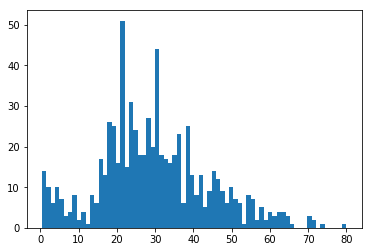

In [33]:
plt.hist(train.Age, bins=70)

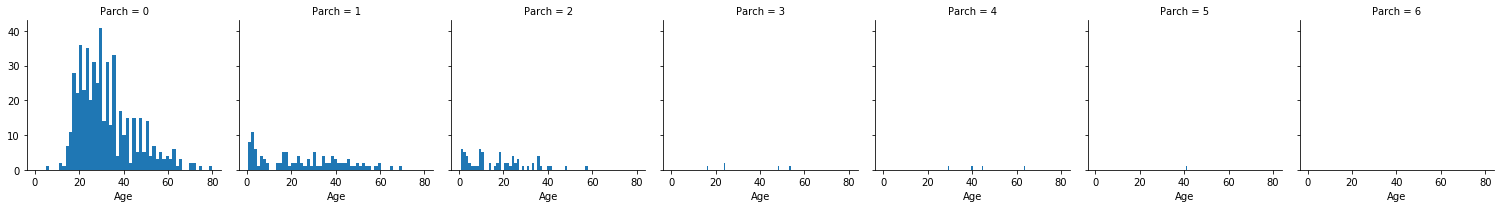

In [34]:
age_facet = sb.FacetGrid(train, col='Parch')
age_facet.map(plt.hist, 'Age', bins=50)

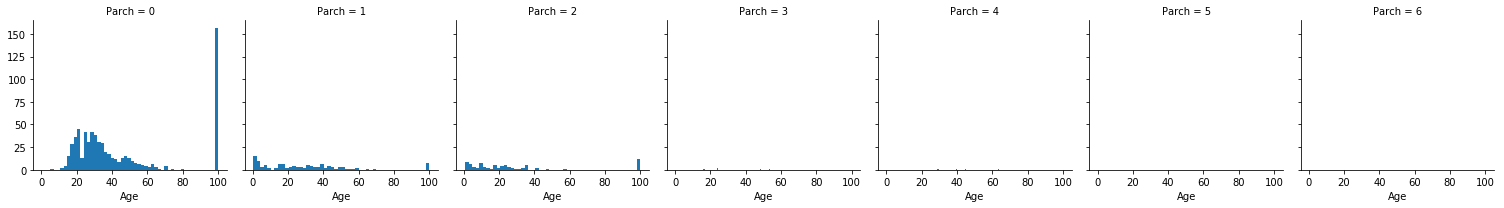

In [35]:
train = train.fillna(100)
age_facet = sb.FacetGrid(train, col='Parch')
age_facet.map(plt.hist, 'Age', bins=50)

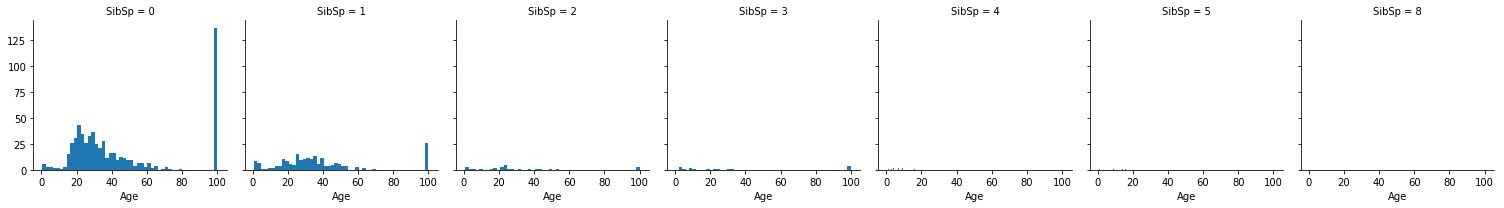

In [36]:
sibsp_facet = sb.FacetGrid(train, col='SibSp')
sibsp_facet.map(plt.hist, 'Age', bins=50)

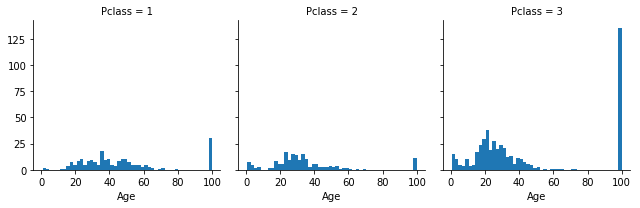

In [37]:
pclass_facet = sb.FacetGrid(train, col='Pclass')
pclass_facet.map(plt.hist, 'Age', bins=50)

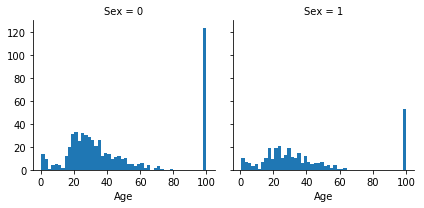

In [38]:
sex_facet = sb.FacetGrid(train, col='Sex')
sex_facet.map(plt.hist, 'Age', bins=50)

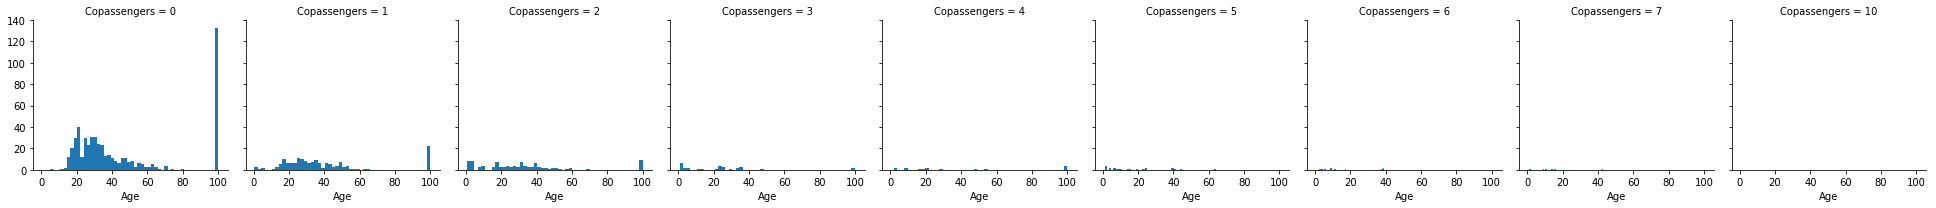

In [39]:
copass_facet = sb.FacetGrid(train, col='Copassengers')
copass_facet.map(plt.hist, 'Age', bins=50)

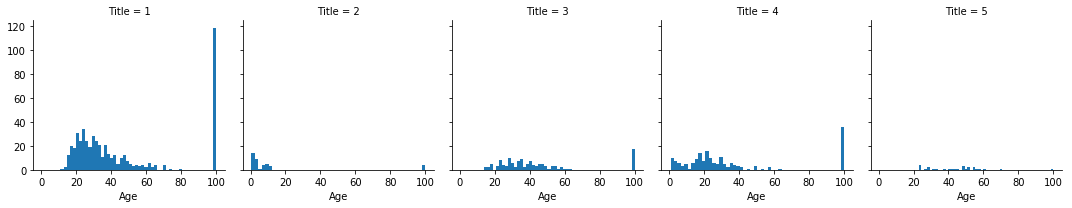

In [40]:
title_facet = sb.FacetGrid(train, col='Title')
title_facet.map(plt.hist, 'Age', bins=50)

(array([ 8., 91.,  3., 20.,  5., 15.,  7.,  3.,  1.,  1.,  1.,  3.,  4.,
         0.,  0.,  7.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  0.    ,   4.5505,   9.101 ,  13.6515,  18.202 ,  22.7525,
         27.303 ,  31.8535,  36.404 ,  40.9545,  45.505 ,  50.0555,
         54.606 ,  59.1565,  63.707 ,  68.2575,  72.808 ,  77.3585,
         81.909 ,  86.4595,  91.01  ,  95.5605, 100.111 , 104.6615,
        109.212 , 113.7625, 118.313 , 122.8635, 127.414 , 131.9645,
        136.515 , 141.0655, 145.616 , 150.1665, 154.717 , 159.2675,
        163.818 , 168.3685, 172.919 , 177.4695, 182.02  , 186.5705,
        191.121 , 195.6715, 200.222 , 204.7725, 209.323 , 213.8735,
        218.424 , 222.9745, 227.525 ]),
 <a list of 50 Patch objects>)

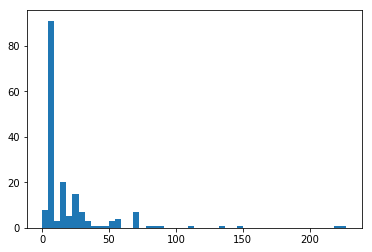

In [41]:
plt.hist(train.Fare[train.Age == 100], bins=50)

### Overall it seems like whether age is known or unknown is fairly random is does not depend much on any of the other variables,  but we will still try linear regression

In [42]:
#We need to reverse the fillna
train.Age.loc[train.Age == 100] = None

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train.dropna(axis=0).drop(columns=['Age']),
    train.dropna(axis=0).Age)
reg = LinearRegression().fit(X_train, y_train)
test_preds = reg.predict(X_test)
test_preds

array([21.80029606, 20.42952053, 38.96948767, 37.36144079, 27.51521775,
       29.32033488, 30.81264751, 29.32172172, 29.30864298, 29.63348057,
       22.29271299, 29.3214591 , 30.90893273, 13.47444496, 25.4104049 ,
       17.95517512, 29.32209586, 29.41307366, 46.37078842, 29.41307366,
       36.93423671, 22.56719177, 21.78456237, 29.32172172, 21.75184414,
       24.74984235, 29.32033488, 34.86562951, 17.16309887, 26.93199916,
       24.82577059, 30.04630692, 29.32033488, 16.68100595, 35.70174964,
       45.54150045, 29.32033488, 19.65583799, 28.78759923, 29.16161433,
       37.50084423, 37.50084423, 22.56854083, 38.89576152, 30.5511446 ,
       34.97765383, 34.12247742, 33.30697735, 36.93423671, 33.73126893,
       25.48960195, 34.44138945, 27.5163042 , 30.80949969, 29.3117908 ,
       39.45282961, 37.01228799, 45.52800979, 33.56887951, 31.50047338,
       34.93268498, 32.9543902 , 29.3097672 , 27.51559189, 29.19015006,
       25.4720641 , 29.32280817, 33.5918655 , 30.15029738, 21.64

In [44]:
reg.score(X_test, y_test)

0.2861875771839312

In [45]:
#So linear regression seems to be a terrible way of predicting the age, which agrees with our above hypothesis that the missing age values seem pretty
#random. We will use it regardless because its better than nothing.
reg.score(X_train, y_train)

0.2750733446833563

In [46]:
#Let's see which attributes were the most important
pd.Series(reg.coef_, index=train.drop(columns=['Age']).columns)

Survived       -6.591912
Pclass         -8.202544
Sex             3.382162
SibSp          -2.330538
Parch           0.900494
Fare           -0.008994
Embarked        0.822543
Copassengers   -1.430044
Title          -1.729555
dtype: float64

(array([ 4.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  4.,  1.,  3.,  5.,  0.,  1.,  0.,
        21.,  3.,  3.,  3.,  4.,  4.,  6., 52., 21.,  1.,  0.,  1.,  3.,
         2.,  1.,  7.,  6.,  2.,  0.,  0.,  0.,  1.,  3., 11.]),
 array([-4.18303825, -3.17195646, -2.16087468, -1.14979289, -0.1387111 ,
         0.87237068,  1.88345247,  2.89453425,  3.90561604,  4.91669782,
         5.92777961,  6.9388614 ,  7.94994318,  8.96102497,  9.97210675,
        10.98318854, 11.99427032, 13.00535211, 14.0164339 , 15.02751568,
        16.03859747, 17.04967925, 18.06076104, 19.07184282, 20.08292461,
        21.0940064 , 22.10508818, 23.11616997, 24.12725175, 25.13833354,
        26.14941532, 27.16049711, 28.1715789 , 29.18266068, 30.19374247,
        31.20482425, 32.21590604, 33.22698782, 34.23806961, 35.2491514 ,
        36.26023318, 37.27131497, 38.28239675, 39.29347854, 40.30456032,
        41.31564211, 42.3267239 , 43.33780568, 44.34888747,

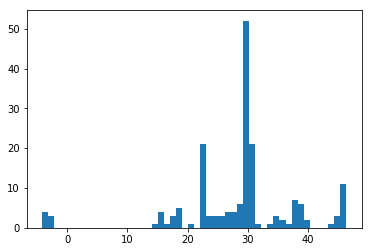

In [47]:
age_preds = reg.predict(train.loc[train.Age.isnull()].drop(columns=['Age']))
plt.hist(age_preds, bins=50)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

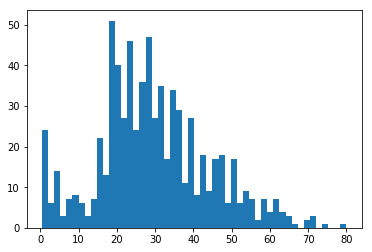

In [48]:
plt.hist(train.Age, bins=50)

In [49]:
#there are some incorrect negative age preds
#lets make them the average
age_preds[age_preds <= 0] = age_preds.mean()

In [50]:
train.Age[train.Age.isnull()] = age_preds
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund to Dooley
Data columns (total 10 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Embarked        891 non-null int64
Copassengers    891 non-null int64
Title           891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 96.6+ KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
#lets review
train.head()
#All variables are now numerical and there are no null values
#We can probably change the fare into categories so lets do that using k means clustering

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Copassengers,Title
Surname,,,,,,,,,,
Braund,0,3,0,22.0,1,0,7.2500,1,1,1
Cumings,1,1,1,38.0,1,0,71.2833,2,1,3
Heikkinen,1,3,1,26.0,0,0,7.9250,1,0,4
Futrelle,1,1,1,35.0,1,0,53.1000,1,1,3
Allen,0,3,0,35.0,0,0,8.0500,1,0,1


## Using k means to categorize fares
I actually looked up online that there were 4 fare classes, so we can check this using k means.

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=4)

In [54]:
kmeans_fare = np.array(train.Fare.values)
kmeans_fare = kmeans_fare.reshape(-1, 1)
kmeans.fit(kmeans_fare)
preds = kmeans.predict(kmeans_fare)

In [55]:
pred0 = kmeans_fare[preds == 0]
pred1 = kmeans_fare[preds == 1]
pred2 = kmeans_fare[preds == 2]
pred3 = kmeans_fare[preds == 3]

In [56]:
pred0.mean()

75.57133857142856

In [57]:
pred1.mean()

15.053372916666664

In [58]:
pred2.mean()

204.94806428571425

In [59]:
pred3.mean()

512.3292

In [60]:
scores = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_fare)
    score = -kmeans.score(kmeans_fare)
    scores.append(score)

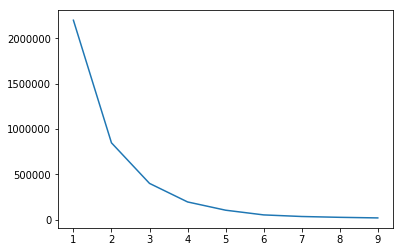

In [61]:
plt.plot(np.arange(1, 10), scores)

In [62]:
len(pred0)

140

In [63]:
len(pred1)

720

In [64]:
len(pred2)

28

In [65]:
len(pred3)

3

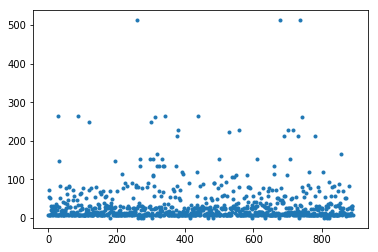

In [66]:
plt.scatter(np.arange(len(train.Fare)), train.Fare, marker='.')

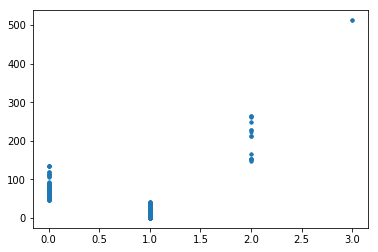

In [67]:
plt.scatter(preds, train.Fare, marker='.')

In [68]:
print(pred0.min())
print(pred0.max())
print(pred2.min())
print(pred2.max())
print(pred1.min())
print(pred1.max())
print(pred3.min())
print(pred3.max())

46.9
135.6333
146.5208
263.0
0.0
42.4
512.3292
512.3292


In [69]:
bins = pd.IntervalIndex.from_tuples([(-1, 43), (46, 136), (146, 264), (510,
                                                                       513)])
train['FareClass'] = pd.cut(train.Fare, bins)
fareclass_dict = {
    pd.Interval(left=-1, right=43): 1,
    pd.Interval(left=46, right=136): 2,
    pd.Interval(left=146, right=264): 3,
    pd.Interval(left=510, right=513): 4
}
train.FareClass = train.FareClass.apply(lambda x: fareclass_dict[x])

In [70]:
#Lets see who the 3 most expensive tickets were
#Apparently these three people were all on the Cardeza family ticket, and they stayed in one of the most expensive parlor suites
train.loc[train.FareClass == 4]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Copassengers,Title,FareClass
Surname,,,,,,,,,,,
Ward,1,1,1,35.0,0,0,512.3292,2,0,4,4
Cardeza,1,1,0,36.0,0,1,512.3292,2,1,1,4
Lesurer,1,1,0,35.0,0,0,512.3292,2,0,1,4


In [71]:
#We can now drop fare
train = train.drop(columns='Fare')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Copassengers,Title,FareClass
Surname,,,,,,,,,,
Braund,0,3,0,22.0,1,0,1,1,1,1
Cumings,1,1,1,38.0,1,0,2,1,3,2
Heikkinen,1,3,1,26.0,0,0,1,0,4,1
Futrelle,1,1,1,35.0,1,0,1,1,3,2
Allen,0,3,0,35.0,0,0,1,0,1,1


(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 27., 17., 56., 41.,
        46., 51., 30., 41., 60., 82., 57., 17., 39., 30., 20., 34.,  8.,
        18., 11., 30., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

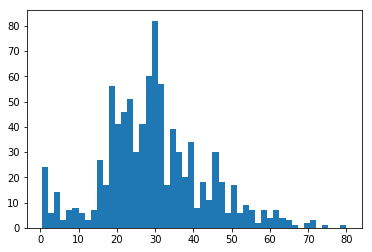

In [72]:
#Lets see if we can also categorize age in the same way
plt.hist(train.Age, bins=50)

In [73]:
kmeans_age = np.array(train.Age.values)
kmeans_age = kmeans_age.reshape(-1, 1)
scores = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_age)
    score = -kmeans.score(kmeans_age)
    scores.append(score)

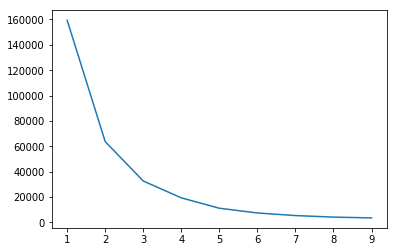

In [74]:
plt.plot(np.arange(1, 10), scores)

In [75]:
#it seems like 4 clusters is the best choice here
kmeans = KMeans(n_clusters=4)
kmeans.fit(kmeans_age)
preds = kmeans.predict(kmeans_age)

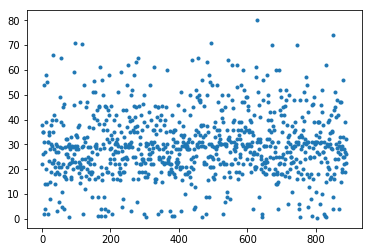

In [76]:
plt.scatter(np.arange(len(train.Age)), train.Age, marker='.')

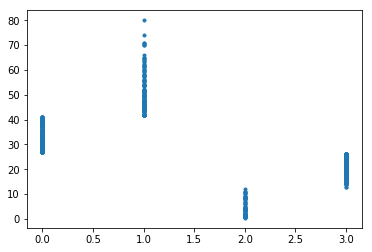

In [77]:
plt.scatter(preds, train.Age, marker='.')

In [78]:
pred0 = kmeans_age[preds == 0]
pred1 = kmeans_age[preds == 1]
pred2 = kmeans_age[preds == 2]
pred3 = kmeans_age[preds == 3]
print(pred0.min())
print(pred0.max())
print(pred3.min())
print(pred3.max())
print(pred1.min())
print(pred1.max())
print(pred2.min())
print(pred2.max())

27.0
41.0
13.0
26.247712613395255
42.0
80.0
0.42
12.0


In [79]:
#These grouping seem a little weird, especially the division at age 27, which is close to the avg age of the passengers and thus should be grouped
#together. Let's try 3 clusters.
kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_age)
preds = kmeans.predict(kmeans_age)
pred0 = kmeans_age[preds == 0]
pred1 = kmeans_age[preds == 1]
pred2 = kmeans_age[preds == 2]
print(pred0.min())
print(pred0.max())
print(pred1.min())
print(pred1.max())
print(pred2.min())
print(pred2.max())

23.481399500028783
40.5
0.42
23.0
41.0
80.0


In [80]:
#This makes more sense, although we will modify these groupings a little bit. It makes sense to decrease the first division from 22 to 16, the age
#of consent.
bins = pd.IntervalIndex.from_tuples([(0, 16), (16, 41), (41, 81)],
                                    closed='left')
train['AgeGroup'] = pd.cut(train.Age, bins)
agegroup_dict = {
    pd.Interval(left=0, right=16, closed='left'): 1,
    pd.Interval(left=16, right=41, closed='left'): 2,
    pd.Interval(left=41, right=81, closed='left'): 3
}
train.AgeGroup = train.AgeGroup.apply(lambda x: agegroup_dict[x])

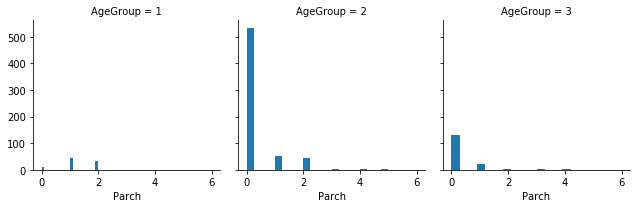

In [81]:
#It makes sense that age group 1 doesn't have a parch beyond 2, which means that they don't have 3 parents
agegroup_facet = sb.FacetGrid(train, col='AgeGroup')
agegroup_facet.map(plt.hist, 'Parch', bins=20)

In [82]:
#Young teens on board without parents
train.loc[(train.AgeGroup == 1) & (train.Parch == 0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Copassengers,Title,FareClass,AgeGroup
Surname,,,,,,,,,,,
Nasser,1,2,1,14.000000,1,0,2,1,3,1,1
Vestrom,0,3,1,14.000000,0,0,1,0,4,1,1
McGowan,1,3,1,15.000000,0,0,3,0,4,1,1
Nicola-Yarred,1,3,1,14.000000,1,0,2,1,4,1,1
Zabour,0,3,1,14.500000,1,0,2,1,4,1,1
Nicola-Yarred,1,3,0,12.000000,1,0,2,1,2,1,1
McCoy,1,3,1,14.909136,2,0,3,2,4,1,1
Hassan,0,3,0,11.000000,0,0,2,0,1,1,1
Emanuel,1,3,1,5.000000,0,0,1,0,4,1,1


In [83]:
#final cleanup
train = train.drop(columns=['SibSp', 'Parch'])
train.head()

,Survived,Pclass,Sex,Age,Embarked,Copassengers,Title,FareClass,AgeGroup
Surname,,,,,,,,,
Braund,0,3,0,22.0,1,1,1,1,2
Cumings,1,1,1,38.0,2,1,3,2,2
Heikkinen,1,3,1,26.0,1,0,4,1,2
Futrelle,1,1,1,35.0,1,1,3,2,2
Allen,0,3,0,35.0,1,0,1,1,2


# Data Analysis

In [84]:
#Now its time to figure out who died and why
#Pclass, sex, and title seem to be most important determinants of survival
train.groupby('Survived').mean()

,Pclass,Sex,Age,Embarked,Copassengers,Title
Survived,,,,,,
0,2.531876,0.147541,30.76697,1.307832,0.883424,1.535519
1,1.950292,0.681287,28.02033,1.447368,0.938596,2.900585


In [85]:
train.groupby('Survived').std()

,Pclass,Sex,Age,Embarked,Copassengers,Title
Survived,,,,,,
0,0.735805,0.354968,12.823354,0.620478,1.830669,1.129044
1,0.863321,0.466660,14.084348,0.651082,1.186076,1.233239


In [86]:
#1:Mr, 2:Master, 3:Mrs, 4:Miss
#men unlikely to survive
#Upper class women and children highly likely to survive
#overall, title simply seems to represent age, sex, and class
train.pivot_table(
    values='Survived', aggfunc=np.mean, index='Title', columns='Pclass')

Pclass,1,2,3
Title,,,
1,0.345794,0.087912,0.112853
2,1.000000,1.000000,0.392857
3,0.976190,0.902439,0.500000
4,0.956522,0.941176,0.500000
5,0.611111,0.111111,NaN


In [87]:
#lets look at the size of these groups
train.pivot_table(
    values='Survived', aggfunc='count', index='Title', columns='Pclass')

Pclass,1,2,3
Title,,,
1,107.0,91.0,319.0
2,3.0,9.0,28.0
3,42.0,41.0,42.0
4,46.0,34.0,102.0
5,18.0,9.0,NaN


In [88]:
#this seems to be too few kids, let's look at age and title
train.pivot_table(
    values='Survived',
    aggfunc='count',
    index='Title',
    columns=['AgeGroup', 'Pclass'])

AgeGroup    1                2                  3            
Pclass      1    2     3     1     2      3     1     2     3
Title                                                        
1         NaN  NaN   4.0  50.0  75.0  286.0  57.0  16.0  29.0
2         3.0  9.0  25.0   NaN   NaN    3.0   NaN   NaN   NaN
3         NaN  1.0   1.0  25.0  29.0   33.0  17.0  11.0   8.0
4         3.0  9.0  33.0  36.0  23.0   68.0   7.0   2.0   1.0
5         NaN  NaN   NaN   8.0   4.0    NaN  10.0   5.0   NaN

In [89]:
#It seems like many female children were referred to as 'Miss' and boys as 'Master'
train.loc[train.AgeGroup == 1].describe()

,Survived,Pclass,Sex,Age,Embarked,Copassengers,Title
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.568182,2.647727,0.534091,6.884542,1.340909,3.034091,3.000000
std,0.498168,0.607232,0.501695,5.053366,0.604321,1.926517,1.061337
min,0.000000,1.000000,0.000000,0.420000,1.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000
50%,1.000000,3.000000,1.000000,5.500000,1.000000,2.500000,4.000000
75%,1.000000,3.000000,1.000000,11.000000,2.000000,5.000000,4.000000
max,1.000000,3.000000,1.000000,15.622843,3.000000,7.000000,4.000000


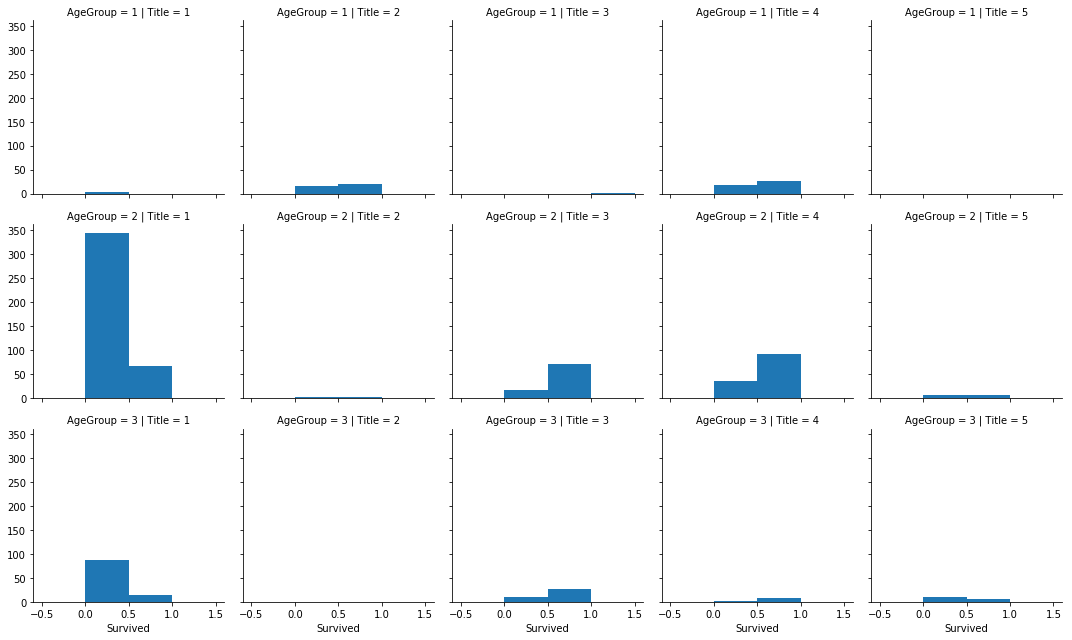

In [90]:
#women more likely to survive than children !!!!!!!!
#this is a very surprising finding, since you would expect people to let children on the lifeboats first
#it might be that there were very few children and they were not strong enough to get to the lifeboats
pclass_facet = sb.FacetGrid(train, col='Title', row='AgeGroup')
pclass_facet.map(plt.hist, 'Survived', bins=2)

In [91]:
#now lets look at how group size affected survival
#its surprising that having more family members did not reduce survival rate
#in fact, the correlation is inversed
train.groupby('Copassengers').mean()

,Survived,Pclass,Sex,Age,Embarked,Title
Copassengers,,,,,,
0,0.303538,2.400372,0.234637,32.018028,1.370577,1.782123
1,0.552795,1.919255,0.540373,30.814636,1.428571,2.354037
2,0.578431,2.225490,0.480392,25.559250,1.343137,2.441176
3,0.724138,2.068966,0.655172,18.632338,1.241379,2.793103
4,0.200000,2.666667,0.800000,19.417368,1.133333,3.333333
5,0.136364,2.590909,0.363636,18.409091,1.454545,2.318182
6,0.333333,3.000000,0.666667,15.166667,1.000000,3.083333
7,0.000000,3.000000,0.333333,15.666667,1.000000,2.333333
10,0.000000,3.000000,0.428571,28.505788,1.000000,2.428571


Now lets actually predict the survival rate of the test dataset

# Predictions of test dataset

In [92]:
#first we need to change test such that it matches the format of train
test['PassengerId'] = test.index
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
PassengerId    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [94]:
#The reason why age is still a column is because that carries more information and might or might not be more useful than AgeGroup
train.head()

,Survived,Pclass,Sex,Age,Embarked,Copassengers,Title,FareClass,AgeGroup
Surname,,,,,,,,,
Braund,0,3,0,22.0,1,1,1,1,2
Cumings,1,1,1,38.0,2,1,3,2,2
Heikkinen,1,3,1,26.0,1,0,4,1,2
Futrelle,1,1,1,35.0,1,1,3,2,2
Allen,0,3,0,35.0,1,0,1,1,2


In [95]:
test = test.drop(columns=['Cabin', 'Ticket'])
Sex_dict = {'female': 1, 'male': 0}


def Sex_apply(gender):
    return Sex_dict[gender]


test.Sex = test.Sex.apply(Sex_apply)
Emb_dict = {'S': 1, 'C': 2, 'Q': 3}
test.Embarked = test.Embarked.apply(lambda x: Emb_dict[x])
test['Copassengers'] = test.SibSp + test.Parch

In [96]:
test = test.drop(columns=['SibSp', 'Parch'])
test.index = test.Name
temp = pd.Series(
    test.index.str.split(pat='.', expand=True).get_level_values(0))
temp2 = temp.str.split(pat=',', expand=True).iloc[:, 1]
temp3 = temp.str.split(pat=',', expand=True).iloc[:, 0]

temp2.name = 'Title'
temp3.name = 'Surname'

test = test.assign(Title=pd.Series(temp2).values)
test = test.assign(Surname=pd.Series(temp3).values)

title_dict = {
    ' Mr': 1,
    ' Master': 2,
    ' Mrs': 3,
    ' Miss': 4,
    ' Dr': 5,
    ' Rev': 5,
    ' Mlle': 5,
    ' Major': 5,
    ' Col': 5,
    ' Ms': 5,
    ' Don': 5,
    ' Jonkheer': 5,
    ' Capt': 5,
    ' the Countess': 5,
    ' Mme': 5,
    ' Sir': 5,
    ' Lady': 5,
    ' Dona': 5
}


def title_app(title):
    return title_dict[title]


test.Title = test.Title.apply(title_app)

In [97]:
test.index = test.Surname
test = test.drop(columns=['Name', 'Surname'])

In [98]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,PassengerId,Copassengers,Title
Surname,,,,,,,,
Kelly,3,0,34.5,7.8292,3,892,0,1
Wilkes,3,1,47.0,7.0000,1,893,1,3
Myles,2,0,62.0,9.6875,3,894,0,1
Wirz,3,0,27.0,8.6625,1,895,0,1
Hirvonen,3,1,22.0,12.2875,1,896,2,3


In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    test.dropna(axis=0).drop(columns=['Age']),
    test.dropna(axis=0).Age)
reg = LinearRegression().fit(X_train, y_train)
test_preds = reg.predict(X_test)
test_preds

array([22.6616032 , 24.47034115, 41.51643313, 22.77222323, 32.13501034,
       24.64134266, 23.45133676, 35.28218692, 30.31930654, 23.51748752,
       29.95317958, 27.65639863, 24.75136102, 24.62267422, 41.67924597,
       31.13590553, 39.15068058, 36.8531622 , 40.03718552, 23.93663759,
       40.43367125, 30.71984341, 25.37112715, 24.54370566, 30.99357107,
       30.30347349, 38.86231622, 29.22738099, 19.10353885, 23.2486767 ,
       17.73566823, 27.15113254, 26.74307932, 24.12734219, 40.16176143,
       22.87706262, 40.42263638, 19.68881505, 22.65563918, 35.67431108,
       29.80962401, 23.57668788, 29.88093127, 39.47042953, 37.5276165 ,
       14.69543551, 23.50068066, 29.84135558, 20.82270071, 44.15197866,
       31.81253022, 36.7540854 , 30.18244759, 39.63111407, 31.68710695,
       16.21597093, 38.18921927, 22.84598406, 22.19477602, 22.59049571,
       41.10341221, 22.9615183 , 27.30300612, 24.09143118, 32.17147822,
       23.55300918, 18.53091897, 22.60034932, 21.22047825, 39.79

In [100]:
pd.Series(reg.coef_, index=test.drop(columns=['Age']).columns)

Pclass         -7.618460
Sex             6.135734
Fare            0.011670
Embarked        1.301882
PassengerId    -0.007179
Copassengers   -0.525571
Title          -3.237331
dtype: float64

In [101]:
reg.score(X_test, y_test)

0.3656475627060253

In [102]:
reg.score(X_train, y_train)

0.27454464796641076

In [103]:
age_preds = reg.predict(test.loc[test.Age.isnull()].drop(columns=['Age']))

In [104]:
test.Age[test.Age.isnull()] = age_preds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, Kelly to Peter
Data columns (total 8 columns):
Pclass          418 non-null int64
Sex             418 non-null int64
Age             418 non-null float64
Fare            417 non-null float64
Embarked        418 non-null int64
PassengerId     418 non-null int64
Copassengers    418 non-null int64
Title           418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 39.4+ KB


In [106]:
#Lets fix that one Fare NaN value
test.Fare[test.Fare.isnull()] = test.Fare.mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
bins = pd.IntervalIndex.from_tuples([(-1, 43), (45, 137), (146, 264), (510,
                                                                       513)])
test['FareClass'] = pd.cut(test.Fare, bins)
fareclass_dict = {
    pd.Interval(left=-1, right=43): 1,
    pd.Interval(left=45, right=137): 2,
    pd.Interval(left=146, right=264): 3,
    pd.Interval(left=510, right=513): 4
}
test.FareClass = test.FareClass.apply(lambda x: fareclass_dict[x])

bins = pd.IntervalIndex.from_tuples([(0, 16), (16, 41), (41, 81)],
                                    closed='left')
test['AgeGroup'] = pd.cut(test.Age, bins)
agegroup_dict = {
    pd.Interval(left=0, right=16, closed='left'): 1,
    pd.Interval(left=16, right=41, closed='left'): 2,
    pd.Interval(left=41, right=81, closed='left'): 3
}
test.AgeGroup = test.AgeGroup.apply(lambda x: agegroup_dict[x])

In [108]:
test = test.drop(columns=['Fare'])
test.index = test.PassengerId
test = test.drop(columns=['PassengerId'])
test.head()

,Pclass,Sex,Age,Embarked,Copassengers,Title,FareClass,AgeGroup
PassengerId,,,,,,,,
892,3,0,34.5,3,0,1,1,2
893,3,1,47.0,1,1,3,1,3
894,2,0,62.0,3,0,1,1,3
895,3,0,27.0,1,0,1,1,2
896,3,1,22.0,1,2,3,1,2


In [109]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Copassengers,Title,FareClass,AgeGroup
Surname,,,,,,,,,
Braund,0,3,0,22.0,1,1,1,1,2
Cumings,1,1,1,38.0,2,1,3,2,2
Heikkinen,1,3,1,26.0,1,0,4,1,2
Futrelle,1,1,1,35.0,1,1,3,2,2
Allen,0,3,0,35.0,1,0,1,1,2


### ALL SET!

This is a supervised classification task that will be done using logistic regression

In [110]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train.drop(columns='Survived'), train.Survived)
test_preds = clf.predict(test)
test_preds

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [123]:
pd.Series(clf.coef_.squeeze(), index=test.columns)

Pclass         -1.090201
Sex             2.298966
Age            -0.038012
Embarked        0.234059
Copassengers   -0.249830
Title           0.132216
FareClass       0.367350
AgeGroup       -0.204344
dtype: float64

In [112]:
clf.score(train.drop(columns='Survived'), train.Survived)

0.797979797979798

Linear regression has very poor performance on this prediction

(array([266., 152.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

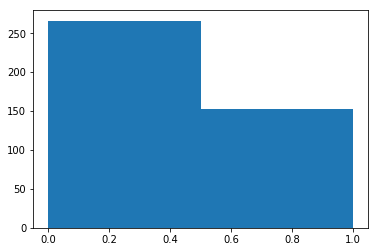

In [114]:
plt.hist(test_preds,bins=2)

(array([549., 342.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

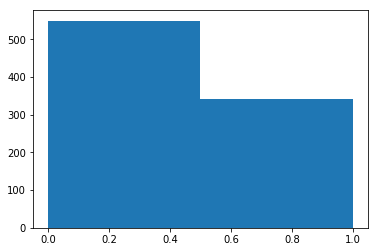

In [115]:
plt.hist(train.Survived,bins=2)

# The End!

In [124]:
submission = pd.DataFrame({
        'PassengerId': test.index,
        'Survived': test_preds
    })
submission.to_csv('submission.csv', index=False)

In [125]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# Final Kaggle Score 0.76/1 :) #8471